In [43]:
import pandas as pd

In [44]:
df = pd.read_csv('data/development.csv').set_index('Id')


In [45]:
df['age_quantiles'] = pd.qcut(df['age'], 20, labels=False, duplicates='drop')
print(df[['age', 'age_quantiles']])

       age  age_quantiles
Id                       
0     24.0              7
1     22.5              6
2     22.0              5
3     22.0              5
4     22.0              5
...    ...            ...
2928  24.0              7
2929  15.0              0
2930  17.0              0
2931  18.0              1
2932  18.0              1

[2933 rows x 2 columns]


In [46]:
quantiles = df['age'].quantile([0.1 * i for i in range(1, 11)])
print(quantiles)

0.1    17.0
0.2    18.0
0.3    20.0
0.4    21.0
0.5    23.0
0.6    25.0
0.7    29.0
0.8    36.0
0.9    48.0
1.0    97.0
Name: age, dtype: float64


<Axes: ylabel='Density'>

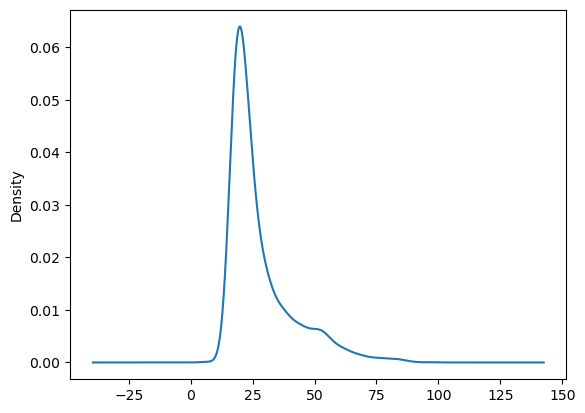

In [47]:
df.age.plot(kind='kde')

In [48]:
import numpy as np
np.sort(df.age.unique())

array([ 6. ,  7. , 15. , 15.5, 16. , 17. , 18. , 19. , 20. , 21. , 22. ,
       22.5, 23. , 24. , 25. , 26. , 27. , 27.5, 28. , 29. , 30. , 31. ,
       32. , 33. , 34. , 35. , 36. , 37. , 38. , 39. , 40. , 41. , 42. ,
       43. , 44. , 45. , 46. , 47. , 48. , 49. , 50. , 51. , 52. , 53. ,
       54. , 55. , 56. , 57. , 58. , 59. , 60. , 61. , 62. , 63. , 64. ,
       65. , 66. , 67. , 68. , 69. , 70. , 71. , 72. , 73. , 74. , 75. ,
       76. , 77. , 78. , 79. , 80. , 81. , 82. , 83. , 84. , 85. , 86. ,
       88. , 90. , 97. ])

In [49]:
df['age'].quantile([0.05, 0.95])

0.05    17.0
0.95    56.0
Name: age, dtype: float64

In [50]:
y_age = df['age']
y = df['age_quantiles']

df.drop(['sampling_rate', 'path', 'num_characters'], axis=1, inplace=True)
df['tempo'] = df['tempo'].apply(lambda x: x.replace('[', '').replace(']', '')).astype('float')
df.drop('ethnicity', axis=1, inplace=True)
gender =  {'male': 1, 'female': 0, "famale": 0}
df['gender'] = df['gender'].map(gender)

X = df.drop(['age_quantiles', 'age'], axis=1)    

In [51]:
X

,gender,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_pauses,silence_duration
Id,,,,,,,,,,,,,,
0,0,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,151.999081,-123.999726,69,39,23.846893
1,0,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,129.199219,-86.928478,69,21,19.388662
2,0,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,117.453835,-98.450670,69,1,21.640998
3,0,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,117.453835,-56.459762,69,9,19.644127
4,1,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,112.347147,-80.349204,69,11,18.041905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,1,1641.14930,3999.1616,145.39359,0.023647,0.115361,0.001879,0.111799,2188.853478,184.570312,-100.921055,69,11,17.461406
2929,0,1089.60050,3984.6550,145.58409,0.015317,0.126740,0.000339,0.070508,2712.362323,83.354335,6.757283,0,1,1.509206
2930,0,994.46484,3989.1785,148.97475,0.009677,0.103535,0.001464,0.058442,2248.698477,89.102909,-53.913449,1,1,1.645034


[8.26681601e-01 6.80367835e-02 3.30999014e-02 2.03408402e-02
 1.67279164e-02 1.22550837e-02 7.45054248e-03 5.84465994e-03
 3.43847520e-03 2.66452589e-03 1.80137897e-03 1.06091102e-03
 5.29414796e-04 6.79657187e-05]


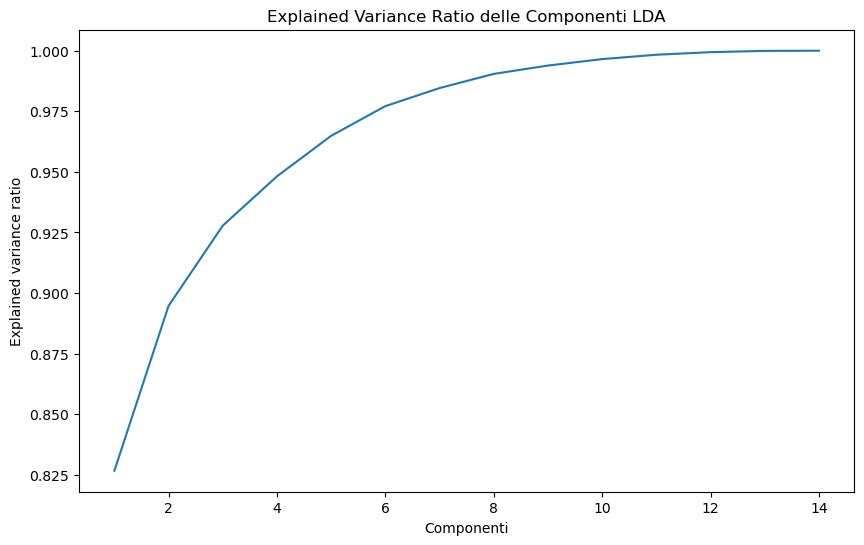

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Creare un'istanza di LDA
lda = LDA()
scaler = StandardScaler()

# Adattare e trasformare i dati
X_lda = lda.fit_transform(scaler.fit_transform(X), y)

import matplotlib.pyplot as plt

# Visualizza l'explained variance
explained_variance = lda.explained_variance_ratio_
print(explained_variance)

# Grafico dell'explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance))
plt.ylabel('Explained variance ratio')
plt.xlabel('Componenti')
plt.title('Explained Variance Ratio delle Componenti LDA')
plt.show()

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# Suddividi i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_age, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

for model in [LinearRegression(), Lasso(), Ridge(), RandomForestRegressor(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor(n_neighbors=30), MLPRegressor()]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    print(f'{model.__class__.__name__} RMSE: {rmse}')


LinearRegression RMSE: 10.400339366673103
Lasso RMSE: 10.499539566999738
Ridge RMSE: 10.400414174383517
RandomForestRegressor RMSE: 10.275293442217587
SVR RMSE: 10.701418545579864
DecisionTreeRegressor RMSE: 13.739127651350438
KNeighborsRegressor RMSE: 10.137152657315985
MLPRegressor RMSE: 10.238476344874977


c:\Users\lucad\miniforge3\envs\dsl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Definisci il pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LDA()),
    ('knn', KNeighborsRegressor())
])

# Definisci i parametri per la grid search
param_grid = {
    'lda__n_components': [1,2,3,4,5,6,7,8,9,None],
    'knn__n_neighbors': [39]
}

# Esegui la grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X, y)

# Stampa i migliori parametri e il miglior score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best RMSE: {-grid_search.best_score_}")



Best parameters: {'knn__n_neighbors': 39, 'lda__n_components': 8}
Best RMSE: 3.963210499282854


In [90]:
lda = LDA(n_components=8)
model = KNeighborsRegressor(n_neighbors=39)
scaler = StandardScaler()

X_lda = lda.fit_transform(scaler.fit_transform(X), y)
model.fit(X_lda, y)

KNeighborsRegressor(n_neighbors=39)

In [91]:
ef = pd.read_csv('data/evaluation.csv').set_index('Id') 
ef.drop(['sampling_rate', 'path', 'num_characters', 'ethnicity'], axis=1, inplace=True)
ef['tempo'] = ef['tempo'].apply(lambda x: x.replace('[', '').replace(']', '')).astype(float)
ef['gender'] = ef['gender'].map(gender)

X_test = lda.transform(scaler.transform(ef))
y_pred = model.predict(X_test)

pd.DataFrame({'Id': ef.index, 'Predicted': y_pred}).to_csv('out/evaluation_submission.csv', index=False)


: 